## CIFAR10

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/1I2aWD5twJdrq0SI2QD91HB5zCvvvCE_i">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# CIFAR10 Dataset

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

We want to train a machine learning model to classify examples with the correct label based on the images.
![title](CIFAR10.jpg)

# Setup

In [1]:
#Importing essential libraries

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

## Loading

In [2]:
#Loading dataset using tenserflow keras datasets

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

## Data Analysis


We can see there are 50.000 training images and 10.000 test images

In [3]:
print(train_images.shape)
print(train_labels.shape)

(50000, 32, 32, 3)
(50000, 1)


In [4]:
print(test_images.shape)
print(test_labels.shape)

(10000, 32, 32, 3)
(10000, 1)


Here we can see an example from our train dataset

label: frog


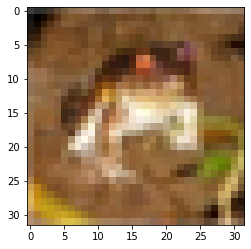

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
index = 0
plt.imshow(train_images[index])
print("label: " + class_names[int(train_labels[index])])

## Preparing

In [6]:
#Divide images with 255 to normalize them between 0 and 1

train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

## Training

In [7]:
#We use the keras sequential model to train our machine learning 

model = keras.Sequential(
    [
        keras.Input((32, 32, 3)),
        layers.Conv2D(32, (3, 3), padding="valid", activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, input_dim=4, activation='relu'),
        layers.Dense(10),
    ]
)

In [8]:
#Gives us a summary of our model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [9]:
#Compile our model

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [10]:
#Defining callbacks

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

In [11]:
#Train our model with specified parameters

history = model.fit(train_images, train_labels, batch_size=64, epochs=10, verbose=1,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping_cb])

Epoch 1/10
782/782 [==============================] - 20s 26ms/step - loss: 1.5469 - accuracy: 0.4336 - val_loss: 1.3007 - val_accuracy: 0.5324
Epoch 2/10
782/782 [==============================] - 20s 26ms/step - loss: 1.1922 - accuracy: 0.5773 - val_loss: 1.1690 - val_accuracy: 0.5912
Epoch 3/10
782/782 [==============================] - 20s 26ms/step - loss: 1.0452 - accuracy: 0.6316 - val_loss: 1.0128 - val_accuracy: 0.6428
Epoch 4/10
782/782 [==============================] - 20s 25ms/step - loss: 0.9394 - accuracy: 0.6700 - val_loss: 1.0190 - val_accuracy: 0.6466
Epoch 5/10
782/782 [==============================] - 20s 25ms/step - loss: 0.8663 - accuracy: 0.6974 - val_loss: 0.8958 - val_accuracy: 0.6812
Epoch 6/10
782/782 [==============================] - 20s 25ms/step - loss: 0.8150 - accuracy: 0.7172 - val_loss: 0.9086 - val_accuracy: 0.6854
Epoch 7/10
782/782 [==============================] - 20s 26ms/step - loss: 0.7688 - accuracy: 0.7315 - val_loss: 0.8550 - val_accuracy:

## Evaluation

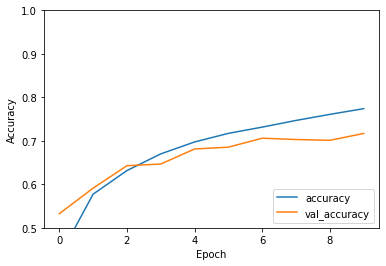

In [12]:
#Create graph using matplotlib

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [13]:
#Evaluate the model using the test dataset

model.evaluate(test_images, test_labels, batch_size=64, verbose=2)

157/157 - 1s - loss: 0.8334 - accuracy: 0.7169 - 1s/epoch - 7ms/step


[0.8334214091300964, 0.7168999910354614]

## Prediction

expected: cat
actual: cat


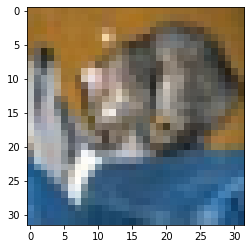

In [14]:
#Prediction to see if our model is accurate

pred_label = model.predict(test_images)

index = 0
plt.imshow(test_images[index])
print("expected: " + class_names[pred_label[index].argmax()])
print("actual: " + class_names[int(test_labels[index])])